In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

map_db = automap_base()

# reflect the tables
map_db.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
map_db.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = map_db.classes.measurement
Station = map_db.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date

('2017-08-23',)

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_arry = date[0]
recent_date = dt.datetime.strptime(date_arry, "%Y-%m-%d").date()

# Calculate the date one year from the last date in data set.
start_date = recent_date - dt.timedelta(days=365)
print(start_date)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.prcp, Measurement.date)\
.filter(Measurement.date >= begining_date).filter(Measurement.date <= recent_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip, columns=["precipitation","date"])

# Sort the dataframe by date
sorted_precip_df = precip_df.sort_values(by="date")


2016-08-23


<Axes: xlabel='date'>

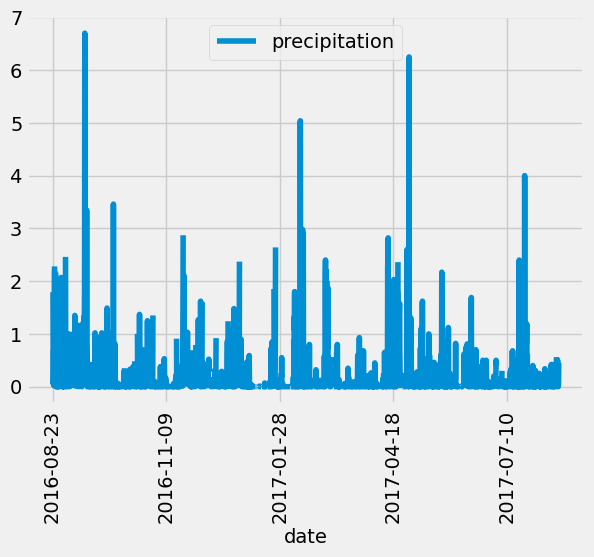

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_precip_df.plot(x="date", y="precipitation", rot=90)


In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station.station).count()
stations

9

In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query((Measurement.station).desc()).all()
active_stations

[('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC005193

In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [42]:
# Close Session
session.close()